In [1]:
### Import statements
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('mobile.csv',encoding='latin-1')

In [3]:
data=data.iloc[:,1:]

In [4]:
data.head()

,product_link-href,name,price,delivery_time,battery,seller,seller_rating,Color,ram,rom,...,camera_rating,battery_rating,display_rating,value_for_money_rating,review_link,brand,no._of_reviews,positive_reviews_score,negative_reviews_score,total_reviews_score
0,https://www.flipkart.com/honor-8/p/itmeuydakfe...,Honor 8 (4 GB RAM),"?29,999",4-6 days,3000 Li-Polymer Battery,SuperComNet,4.5,Sapphire Blue,4 GB,32 GB,...,4.8,3.8,4.8,4.5,https://www.flipkart.com/honor-8/product-revie...,honor,708,650,350,300
1,https://www.flipkart.com/honor-8x-blue-128-gb/...,"Honor 8X (Blue, 128 GB) (6 GB RAM)","?19,490","13 Jan, Sunday",3750 Battery,VTMSLP,3.9,Blue,6 GB,128 GB,...,null,null,null,null,NaN,honor,0,780,220,560
2,https://www.flipkart.com/honor-8-lite-black-64...,"Honor 8 Lite (Black, 64 GB) (4 GB RAM)","?11,999",4-6 days,3000 Battery,RECOM,4.1,Black,4 GB,64 GB,...,3.8,3.9,3.1,4.5,https://www.flipkart.com/honor-8-lite-black-64...,honor,959,730,270,460
3,https://www.flipkart.com/honor-holly-2-plus-go...,"Honor Holly 2 Plus (Gold, 16 GB) (2 GB RAM)","?8,300","2 Days, Friday",4000 Li-Polymer Battery,Asthatraders32,2.8,Gold,2 GB,16 GB,...,3.8,4.7,2.3,4.5,https://www.flipkart.com/honor-holly-2-plus-go...,honor,3875,870,130,740
4,https://www.flipkart.com/honor-8-pro-midnight-...,"Honor 8 Pro (Midnight Black, 128 GB) (6 GB RAM)","?29,999",null,4000 Battery,null,null,Midnight Black,6 GB,128 GB,...,4.3,4.2,4.6,4.6,https://www.flipkart.com/honor-8-pro-midnight-...,honor,2582,600,400,200


## Data Preparation

In [5]:
feature_dataframe=data[['total_reviews_score','no._of_reviews','value_for_money_rating','display_rating','battery_rating','camera_rating','overall_rating']]

In [6]:
feature_dataframe.head()

,total_reviews_score,no._of_reviews,value_for_money_rating,display_rating,battery_rating,camera_rating,overall_rating
0,300,708,4.5,4.8,3.8,4.8,4.4
1,560,0,null,null,null,null,4.5
2,460,959,4.5,3.1,3.9,3.8,4.2
3,740,3875,4.5,2.3,4.7,3.8,4.0
4,200,2582,4.6,4.6,4.2,4.3,4.4


In [7]:
vfm_rating=[]
for rating in feature_dataframe['value_for_money_rating']:
    if(rating=='null'):
        vfm_rating.append(0)
    else:
        vfm_rating.append(rating)
feature_dataframe['vfm_rating']=vfm_rating
feature_dataframe=feature_dataframe.drop('value_for_money_rating',axis=1)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [8]:
feature_dataframe.head()

,total_reviews_score,no._of_reviews,display_rating,battery_rating,camera_rating,overall_rating,vfm_rating
0,300,708,4.8,3.8,4.8,4.4,4.5
1,560,0,null,null,null,4.5,0
2,460,959,3.1,3.9,3.8,4.2,4.5
3,740,3875,2.3,4.7,3.8,4.0,4.5
4,200,2582,4.6,4.2,4.3,4.4,4.6


In [9]:
c_rating=[]
for rating in feature_dataframe['camera_rating']:
    if(rating=='null'):
        c_rating.append(0)
    else:
        c_rating.append(rating)
feature_dataframe['c_rating']=c_rating
feature_dataframe=feature_dataframe.drop('camera_rating',axis=1)

In [10]:
o_rating=[]
for rating in feature_dataframe['overall_rating']:
    if(rating=='null'):
        o_rating.append(0)
    else:
        o_rating.append(rating)
feature_dataframe['o_rating']=o_rating
feature_dataframe=feature_dataframe.drop('overall_rating',axis=1)

In [11]:
b_rating=[]
for rating in feature_dataframe['battery_rating']:
    if(rating=='null'):
        b_rating.append(0)
    else:
        b_rating.append(rating)
feature_dataframe['b_rating']=b_rating
feature_dataframe=feature_dataframe.drop('battery_rating',axis=1)

In [12]:
d_rating=[]
for rating in feature_dataframe['display_rating']:
    if(rating=='null'):
        d_rating.append(0)
    else:
        d_rating.append(rating)
feature_dataframe['d_rating']=d_rating
feature_dataframe=feature_dataframe.drop('display_rating',axis=1)

In [13]:
feature_dataframe.head()

,total_reviews_score,no._of_reviews,vfm_rating,c_rating,o_rating,b_rating,d_rating
0,300,708,4.5,4.8,4.4,3.8,4.8
1,560,0,0,0,4.5,0,0
2,460,959,4.5,3.8,4.2,3.9,3.1
3,740,3875,4.5,3.8,4.0,4.7,2.3
4,200,2582,4.6,4.3,4.4,4.2,4.6


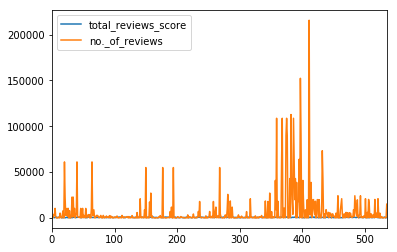

In [14]:
feature_dataframe.plot()

In [15]:
feature_dataframe.tail()

,total_reviews_score,no._of_reviews,vfm_rating,c_rating,o_rating,b_rating,d_rating
531,900,274,0,0,3.9,0,0
532,760,598,0,0,3.8,0,0
533,220,142,0,0,3.7,0,0
534,220,594,4.3,4.4,4.3,4.9,4.2
535,380,14998,4.7,4.5,4.1,3.7,3.9


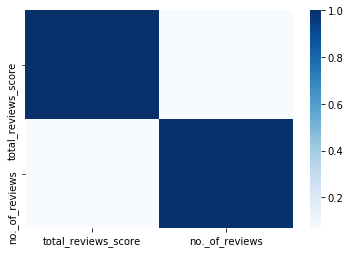

In [19]:
corr=feature_dataframe.corr()
sns.heatmap(corr,cmap='Blues')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 22 columns):
product_link-href         536 non-null object
name                      534 non-null object
price                     536 non-null object
delivery_time             536 non-null object
battery                   536 non-null object
seller                    536 non-null object
seller_rating             536 non-null object
Color                     536 non-null object
ram                       536 non-null object
rom                       526 non-null object
warranty                  536 non-null object
overall_rating            536 non-null object
camera_rating             536 non-null object
battery_rating            536 non-null object
display_rating            536 non-null object
value_for_money_rating    536 non-null object
review_link               517 non-null object
brand                     536 non-null object
no._of_reviews            536 non-null int64
positive_reviews_score

In [23]:
data['generalized_score']=data['total_reviews_score']/data['no._of_reviews']

In [24]:
data.head()

,product_link-href,name,price,delivery_time,battery,seller,seller_rating,Color,ram,rom,...,battery_rating,display_rating,value_for_money_rating,review_link,brand,no._of_reviews,positive_reviews_score,negative_reviews_score,total_reviews_score,generalized_score
0,https://www.flipkart.com/honor-8/p/itmeuydakfe...,Honor 8 (4 GB RAM),"?29,999",4-6 days,3000 Li-Polymer Battery,SuperComNet,4.5,Sapphire Blue,4 GB,32 GB,...,3.8,4.8,4.5,https://www.flipkart.com/honor-8/product-revie...,honor,708,650,350,300,0.423729
1,https://www.flipkart.com/honor-8x-blue-128-gb/...,"Honor 8X (Blue, 128 GB) (6 GB RAM)","?19,490","13 Jan, Sunday",3750 Battery,VTMSLP,3.9,Blue,6 GB,128 GB,...,null,null,null,NaN,honor,0,780,220,560,inf
2,https://www.flipkart.com/honor-8-lite-black-64...,"Honor 8 Lite (Black, 64 GB) (4 GB RAM)","?11,999",4-6 days,3000 Battery,RECOM,4.1,Black,4 GB,64 GB,...,3.9,3.1,4.5,https://www.flipkart.com/honor-8-lite-black-64...,honor,959,730,270,460,0.479666
3,https://www.flipkart.com/honor-holly-2-plus-go...,"Honor Holly 2 Plus (Gold, 16 GB) (2 GB RAM)","?8,300","2 Days, Friday",4000 Li-Polymer Battery,Asthatraders32,2.8,Gold,2 GB,16 GB,...,4.7,2.3,4.5,https://www.flipkart.com/honor-holly-2-plus-go...,honor,3875,870,130,740,0.190968
4,https://www.flipkart.com/honor-8-pro-midnight-...,"Honor 8 Pro (Midnight Black, 128 GB) (6 GB RAM)","?29,999",null,4000 Battery,null,null,Midnight Black,6 GB,128 GB,...,4.2,4.6,4.6,https://www.flipkart.com/honor-8-pro-midnight-...,honor,2582,600,400,200,0.077459


In [36]:
data=data.sort_values('generalized_score',ascending=False)

In [38]:
data.head()

,product_link-href,name,price,delivery_time,battery,seller,seller_rating,Color,ram,rom,...,battery_rating,display_rating,value_for_money_rating,review_link,brand,no._of_reviews,positive_reviews_score,negative_reviews_score,total_reviews_score,generalized_score
315,https://www.flipkart.com/samsung-sm-g361hhadin...,"Samsung Sm-G361Hhadins (Charcoal Gray, 8 GB) ...","?7,849",null,2000 Li-Ion Battery,null,null,Charcoal Gray,1 GB,8 GB,...,null,null,null,NaN,samsung,0,850,150,700,inf
7,https://www.flipkart.com/honor-view-10-midnigh...,"Honor View 10 (Midnight Black, 128 GB) (6 GB ...","?27,299",null,3750 Battery,null,null,Midnight Black,6 GB,128 GB,...,null,null,null,NaN,honor,0,980,20,960,inf
231,https://www.flipkart.com/samsung-metro-b312e-d...,Samsung Metro B312E Dual Sim - White (White),"?1,599",null,1000 Li-Ion Battery,null,null,White,10 MB,1 MB,...,null,null,null,NaN,samsung,0,930,70,860,inf
213,https://www.flipkart.com/samsung-galaxy-note-5...,Samsung Galaxy Note 5 32GB Single Sim - Silver...,"?32,000",null,3000 Battery,null,null,Silver,4 GB,32 GB,...,null,null,null,NaN,samsung,0,700,300,400,inf
211,https://www.flipkart.com/samsung-e1207-guru-fm...,Samsung E1207 Guru FM Dual Sim - Blue (Blue),"?1,560",null,null,null,null,Blue,10 MB,1 MB,...,null,null,null,NaN,samsung,0,650,350,300,inf


In [41]:
data = data[data['generalized_score'] != float("inf")]

In [42]:
data.head()

,product_link-href,name,price,delivery_time,battery,seller,seller_rating,Color,ram,rom,...,battery_rating,display_rating,value_for_money_rating,review_link,brand,no._of_reviews,positive_reviews_score,negative_reviews_score,total_reviews_score,generalized_score
69,https://www.flipkart.com/vivo-y93-starry-black...,"Vivo Y93 (Starry Black, 32 GB) (4 GB RAM)","?13,990","2 Days, Friday",4030 Li-ion Battery,Flashtech Retail,4.9,Starry Black,4 GB,32 GB,...,null,null,null,https://www.flipkart.com/vivo-y93-starry-black...,vivo,5,940,60,880,176.000000
314,https://www.flipkart.com/samsung-galaxy-note-8...,"Samsung Galaxy Note 8 (Midnight Black, 64 GB) ...","?51,950",6-7 days,3300 Battery,MobilesUnlimited,4.6,Midnight Black,6 GB,64 GB,...,null,null,null,https://www.flipkart.com/samsung-galaxy-note-8...,samsung,5,920,80,840,168.000000
81,https://www.flipkart.com/vivo-y93-nebula-purpl...,"Vivo Y93 (Nebula Purple, 32 GB) (4 GB RAM)","?13,990","2 Days, Friday",4030 Li-ion Battery,Flashtech Retail,4.9,Nebula Purple,4 GB,32 GB,...,null,null,null,https://www.flipkart.com/vivo-y93-nebula-purpl...,vivo,5,890,110,780,156.000000
174,https://www.flipkart.com/samsung-galaxy-a8-sta...,"Samsung Galaxy A8 Star (Black, 64 GB) (6 GB RAM)","?28,950",6-7 days,3700 Battery,HubMobile,2.7,Black,6 GB,64 GB,...,null,null,null,https://www.flipkart.com/samsung-galaxy-a8-sta...,samsung,9,940,60,880,97.777778
107,https://www.flipkart.com/vivo-y81i-gold-16-gb/...,"Vivo Y81i (Gold, 16 GB) (2 GB RAM)","?8,490","2 Days, Friday",3260 Li-ion Battery,Flashtech Retail,4.9,Gold,2 GB,16 GB,...,null,null,null,https://www.flipkart.com/vivo-y81i-gold-16-gb/...,vivo,11,970,30,940,85.454545


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 69 to 411
Data columns (total 23 columns):
product_link-href         517 non-null object
name                      517 non-null object
price                     517 non-null object
delivery_time             517 non-null object
battery                   517 non-null object
seller                    517 non-null object
seller_rating             517 non-null object
Color                     517 non-null object
ram                       517 non-null object
rom                       507 non-null object
warranty                  517 non-null object
overall_rating            517 non-null object
camera_rating             517 non-null object
battery_rating            517 non-null object
display_rating            517 non-null object
value_for_money_rating    517 non-null object
review_link               517 non-null object
brand                     517 non-null object
no._of_reviews            517 non-null int64
positive_reviews_scor